In [15]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as opt

# 1 Multiclass classification

## 1.1. Dataset

In [16]:
matdata = sio.loadmat("ex3data1.mat", struct_as_record = False)

lambda_ = 0

X = matdata['X'] 
y = matdata['y']

print("X shape:",X.shape)
print("y shape:",y.shape)

('X shape:', (5000, 400))
('y shape:', (5000, 1))


## 1.2 Visualizing the data

Labels:
[[ 10.  10.  10.  10.   1.]
 [ 10.  10.   1.  10.   1.]
 [  1.   1.   3.   1.   2.]
 [  3.   4.   3.   4.  10.]
 [  1.   4.   5.   2.   3.]]


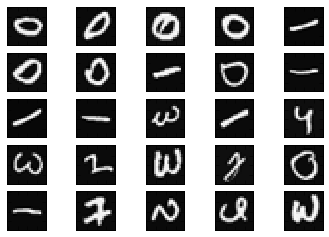

In [17]:
%matplotlib inline
fig = plt.figure()
y_labels = np.zeros((25))
for i in range(1,26):
    idx = i*np.random.randint(1,150) # Random image index
    
    # Show image
    ax = fig.add_subplot(5,5,i)
    ax.matshow(X[idx,:].reshape(20,20), interpolation='nearest', cmap=plt.cm.gray)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    y_labels[i-1] = (y[idx][0]) # Add label

print("Labels:")
print(y_labels.reshape(5,5))

## 1.3 Vectorizing logistic regression

### 1.3.1, 1.3.2, 1.3.3 Vectorizing cost function and gradient

In [ ]:
def sigmoid(z):
    """Logistic regression func, returns probability"""
    return 1/(1+np.exp(-z))

def costFunction(theta, X, y, lambda_a):
    J = 0
    m = y.size
    grad = np.zeros((theta.size,1))
    h = sigmoid(np.matmul(X,theta))#sigmoid(_X.dot(_theta))
    h.shape = (h.size,1)
    
    J = (-1.0/m) * sum( np.matmul(y.T,np.log(h)) + np.matmul((1-y.T),np.log(1-h)) )
    
    # Regularize the cost function - except theta[0]
    J += (lambda_a/(2.0*m)) * sum(np.power(theta[1:],2))
    
    #print ("J:",J)
    return J


## 1.4 One vs All classification

In [19]:
X = np.hstack((np.ones([X.shape[0],1]), X)) # Add ones to X

In [ ]:
# Minimize using scipy fmin

def oneVsAll(num_labels, X, y, lambda_):
    """"trains LR classifier and return classifier params in matrix"""
    #global y_one,X
    
    m = X.shape[0]
    n = X.shape[1]
        
    all_theta = np.zeros((num_labels, n)) # This has to be returned
    
    # Train classifier for each label
    for i in range(num_labels):
        y_one = (y == i+1)
        args = (X, y_one, lambda_)
        all_theta[i,:] = opt.fmin(costFunction, all_theta[i,:].flatten(), args=args,maxiter=10000)
        #print(opt.fmin_powell(decorated_costFunction, all_theta[i,:].flatten(), maxiter=4, retall=True))
     
    return all_theta

all_theta = oneVsAll(10, X, y, lambda_)

### 1.4.1 One Vs All Prediction

In [31]:
def predictOneVsAll(all_theta, X):
    """Predict the label"""
    m = X.shape[0]
    num_labels = all_theta.shape[0]
    
    #return sigmoid(X.dot(all_theta.T))
    return np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)

pred = predictOneVsAll(all_theta, X)
print ("Total accuracy count:", sum(pred.flatten() == y.flatten()))

('Total accuracy count:', 0)


In [ ]:
all_theta[2]